In [73]:
import numpy as np
import matplotlib.pyplot as plt

## Reaction 1
### The production of gRNA2

In [74]:
ahl = np.arange(1e-2, 3+1e-3, 1e-2)
hill1 = 2 # Need reference in written proposal
k1 = 1 # Also need reference in written proposal

# Made up production rate and degradation rate for gRNA2
alpha_g2 = 3
gamma_g2 = 1
leaky_g2 = 0.01

def con_g1(ahl, hill, k, alpha, gamma, leaky):
    """ 
    Takes in an array of ahl concentration value, hill coefficient,
    and rate constants for production, degradation, leaky expression,
    and TF binding k.
    Returns the concentration of gRNA2 using mass kinetic reaction
    assumption.
    """
    ratio = alpha / gamma
    hill_curve = (ahl ** hill) / (k + ahl ** hill)
    return ratio * (hill_curve + leaky)


## Reaction 2
### The production of gRNA1

In [75]:
alpha_g1 = 3
gamma_g1 = 1
leaky_g1 = 0.01

hill2 = 2
k2 = 1

def con_g2(g2, hill, k, alpha, gamma, leaky):
    ratio = alpha / gamma
    hill_curve = k / (k + g2 ** hill)
    return ratio * (hill_curve + leaky)

## Reaction 4
### The production of peptide drug and GFP

In [76]:
alpha_p = 3
gamma_p = 1
leaky_p = 0.01

fnr = np.arange(1e-2, 3+1e-3, 1e-2)
hill_g = 2
k4 = 1

def con_p(g1, fnr, hill, k, alpha, gamma, leaky):
    RNA, FNR = np.meshgrid(g1, fnr)
    ratio = alpha / gamma
    rep = k / (k + RNA ** hill)
    act = (FNR ** hill) / (k + FNR ** hill)
    hill_curve = rep * act
    return ratio * (hill_curve + leaky)

## Plotting

In [77]:
gRNA1 = con_g1(ahl, hill1, k1, alpha_g2, gamma_g2, leaky_g2)
gRNA2 = con_g2(gRNA1, hill2, k2, alpha_g1, gamma_g1, leaky_g1)

# RNA, FNR = np.meshgrid(gRNA1, fnr)
peptide = con_p(gRNA2, fnr, hill_g, k4, alpha_p, gamma_p, leaky_p)

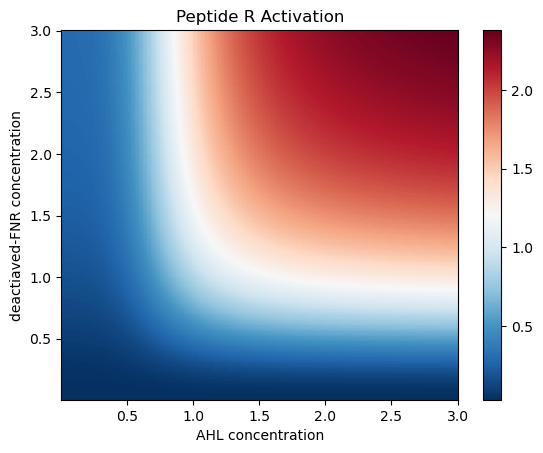

In [82]:
AHL, FNR = np.meshgrid(ahl, fnr)

fig, ax = plt.subplots()
pc = ax.pcolormesh(AHL, FNR, peptide, shading='auto', cmap='RdBu_r')
ax.set_xlabel('AHL concentration')
ax.set_ylabel('deactiaved-FNR concentration')
ax.set_title('Peptide R Activation')
fig.colorbar(pc, ax=ax)
plt.show()

In [80]:
178 + 10.8 + 11.7 + 12.15 + 9.9 + 198.5 + 50 + 50 + 72 + 95 + 141.12 + 86

915.17